# Case Study - Iris
Let's proceed with the tutorial on density-based clustering using the "Iris" dataset. We will demonstrate the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm with multiple values of eps and min_samples for comparison.

## Setup
Dataset Loading and Exploration, Preprocessing. Before applying DBSCAN, we need to preprocess the data to standardize the features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Convert to DataFrame for easier manipulation (optional)
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

## DBSCAN
DBSCAN Clustering with Different `eps` and `min_samples`

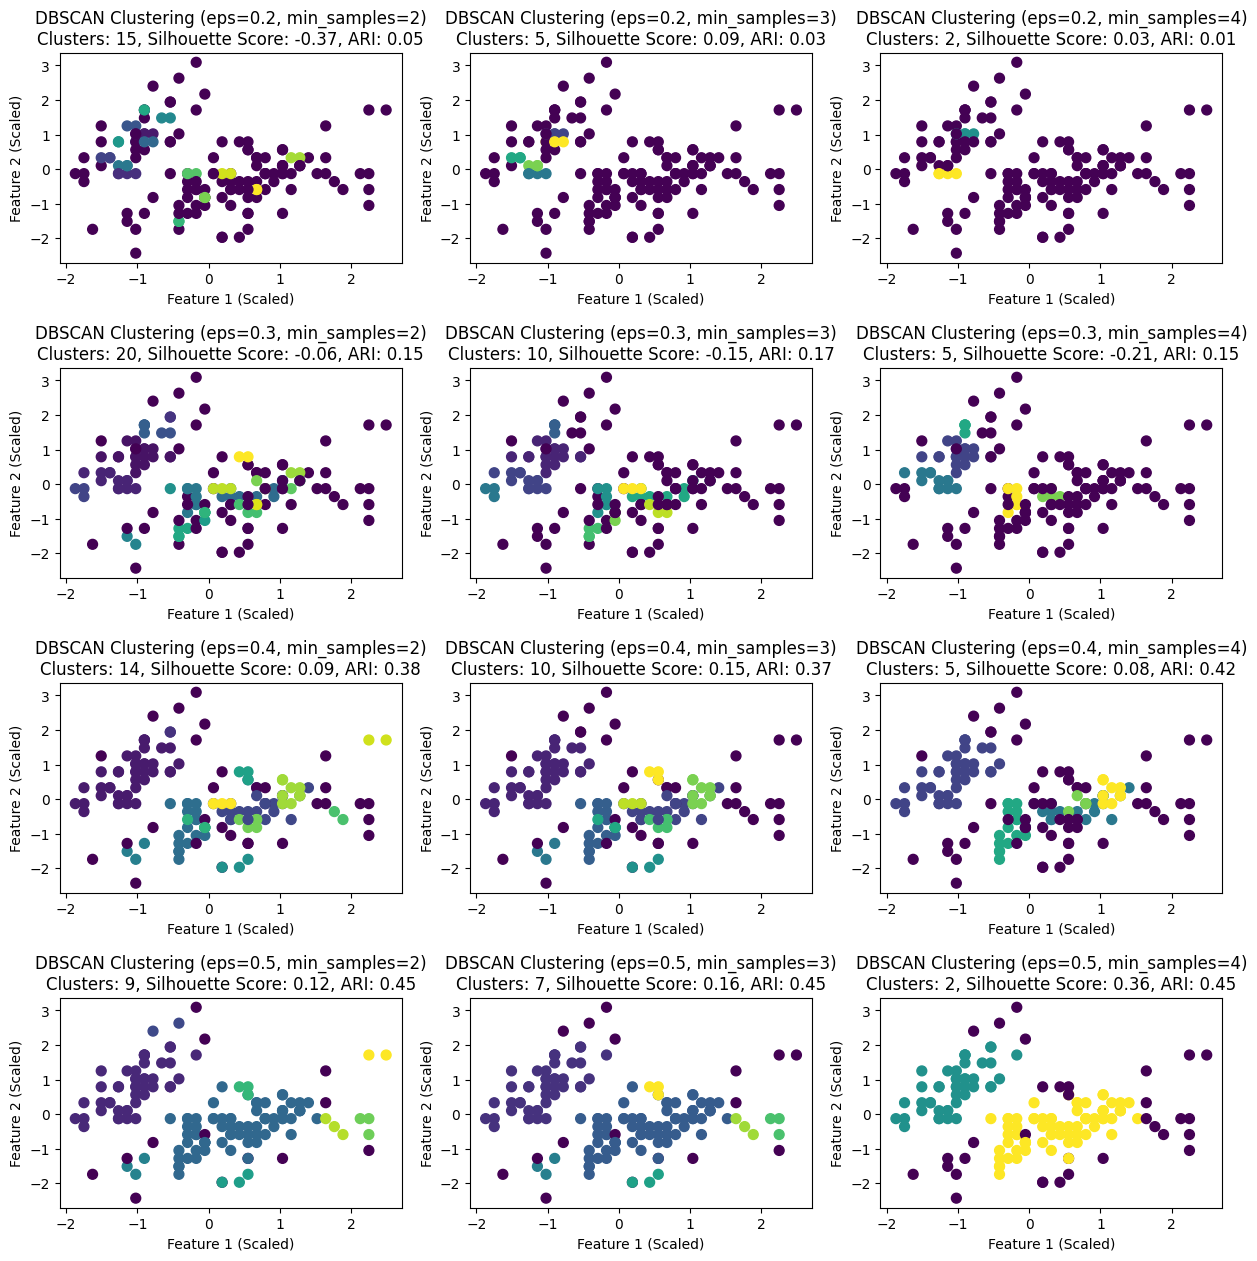

In [6]:
# Define a range of `eps` and `min_samples` values to try
eps_values = [0.2, 0.3, 0.4, 0.5]
min_samples_values = [2, 3, 4]

# Perform DBSCAN clustering with different combinations of `eps` and `min_samples`
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Number of clusters in labels, ignoring noise if present
        n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        # Calculate the silhouette score and adjusted Rand Index (ARI) score
        silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
        ari_score = adjusted_rand_score(y, dbscan_labels)

        # Scatter plot for each combination of eps and min_samples
        axs[i, j].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
        axs[i, j].set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})\n'
                            f'Clusters: {n_clusters_}, Silhouette Score: {silhouette_avg:.2f}, ARI: {ari_score:.2f}')
        axs[i, j].set_xlabel('Feature 1 (Scaled)')
        axs[i, j].set_ylabel('Feature 2 (Scaled)')

plt.show()